In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

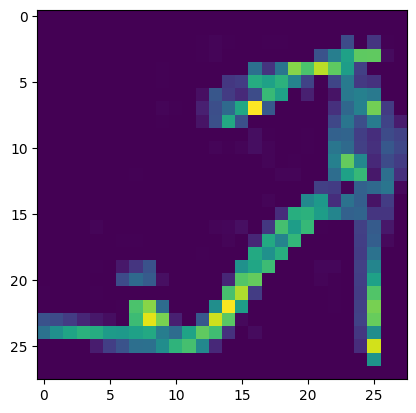

In [8]:
# Plot a single image
import matplotlib.pyplot as plt
plt.imshow(train_data[8])

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

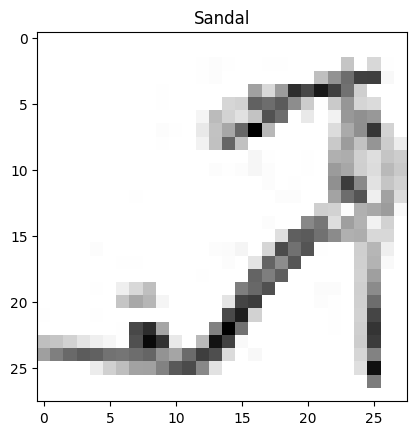

In [14]:
plt.imshow(train_data[8], cmap = plt.cm.binary)
plt.title(class_names[train_labels[8]]);

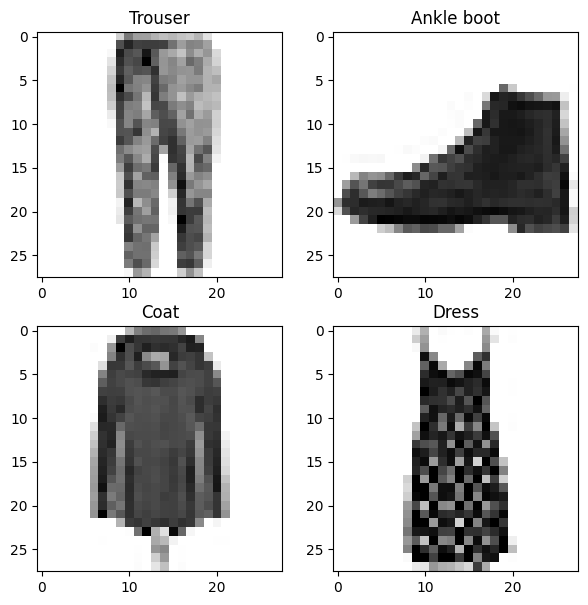

In [16]:
import random
plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis()

In [24]:
from tensorflow.keras import layers, models

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [26]:
history1 = model_1.fit(train_data,
                      train_labels,
                      epochs = 10,
                      validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0966 - loss: 2.3350 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0984 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - 

In [27]:
train_data.min(), train_data.max()

(0, 255)

In [29]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), test_data.max()

(0.0, 0.00392156862745098)

In [30]:
model_2 = tf.keras.Sequential([
    layers.Flatten(input_shape = (28, 28)),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
history2 = model_2.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2307 - loss: 2.0827 - val_accuracy: 0.4464 - val_loss: 1.5021
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4675 - loss: 1.4027 - val_accuracy: 0.5289 - val_loss: 1.1874
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5321 - loss: 1.1497 - val_accuracy: 0.5803 - val_loss: 1.0580
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5928 - loss: 1.0321 - val_accuracy: 0.6205 - val_loss: 0.9759
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6368 - loss: 0.9544 - val_accuracy: 0.6478 - val_loss: 0.9248
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6588 - loss: 0.9063 - val_accuracy: 0.6583 - val_loss: 0.8918
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6723 - loss: 0.8745 - val_accuracy: 0.6680 - val_loss: 0.8689
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6806 - loss: 0.8521 - 

<Axes: title={'center': 'Normalized Data'}>

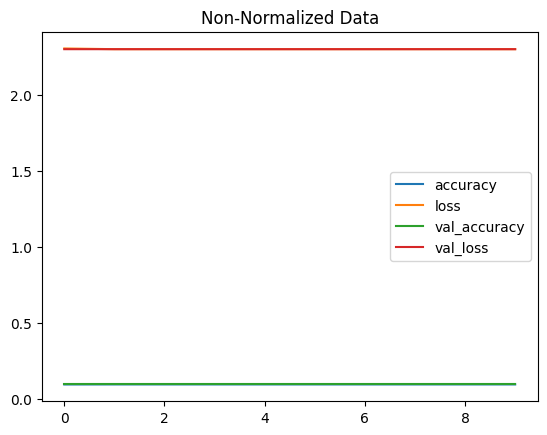

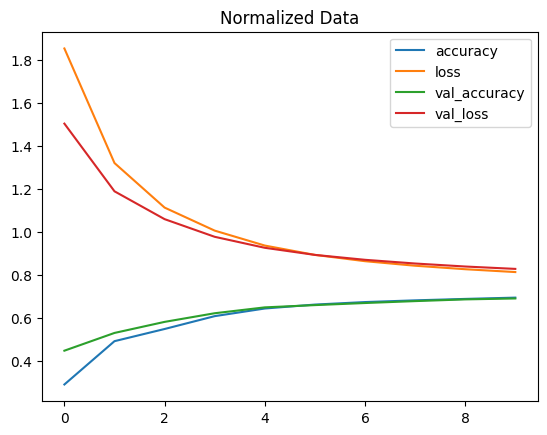

In [32]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history1.history).plot(title = 'Non-Normalized Data')
# Plot normalized data loss curves
pd.DataFrame(history2.history).plot(title = 'Normalized Data')

In [77]:
model_3 = tf.keras.Sequential([
    layers.Flatten(input_shape = (28, 28)),
    layers.Dense(14, activation = 'relu'),
    layers.Dense(14, activation = 'relu'),
    layers.Dense(14, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [78]:
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

In [79]:
history = model_3.fit(train_data,
            train_labels,
            epochs = 20,
            validation_data = (test_data, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3737 - loss: 1.5946 - val_accuracy: 0.6593 - val_loss: 0.8819
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6799 - loss: 0.8506 - val_accuracy: 0.7077 - val_loss: 0.7884
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7210 - loss: 0.7685 - val_accuracy: 0.7288 - val_loss: 0.7413
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7407 - loss: 0.7222 - val_accuracy: 0.7462 - val_loss: 0.7078
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7537 - loss: 0.6882 - val_accuracy: 0.7574 - val_loss: 0.6788
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7654 - loss: 0.6566 - val_accuracy: 0.7678 - val_loss: 0.6464
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7757 - loss: 0.6212 - val_accuracy: 0.7753 - val_loss: 0.6143
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7864 - loss: 0.5898 - 

In [81]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [82]:
# Make predictions with the most recent model
y_probs = model_3.predict(test_data)

y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[2.4480953e-09, 5.5604285e-11, 3.2583654e-09, 1.5122448e-07,
        3.7271581e-09, 2.3446806e-01, 2.9119924e-08, 2.6445588e-01,
        1.0877199e-03, 4.9998817e-01],
       [4.0202244e-04, 4.8393740e-06, 9.6066254e-01, 3.2834249e-04,
        3.5394360e-03, 8.7971300e-15, 3.4801818e-02, 0.0000000e+00,
        2.6112166e-04, 3.3763135e-29],
       [2.2003074e-05, 9.9904352e-01, 1.2220462e-06, 8.5924967e-04,
        7.1703362e-05, 9.8029375e-13, 2.1991441e-06, 3.0381494e-30,
        1.4572324e-09, 4.4205027e-28],
       [3.8451759e-05, 9.9766344e-01, 5.7716788e-06, 1.9935730e-03,
        2.9219335e-04, 4.5405728e-11, 6.5644012e-06, 1.8578083e-26,
        9.9910098e-09, 5.3332430e-25],
       [1.6755636e-01, 1.3343418e-03, 1.5644573e-01, 1.8358491e-02,
        9.4493618e-03, 1.1923064e-09, 6.4322609e-01, 7.3640926e-28,
        3.6296898e-03, 9.4983123e-19]], dtype=float32)

In [83]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [84]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis = 1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [85]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_preds)
cm

array([[782,   4,  16,  71,   3,   3, 107,   0,  14,   0],
       [  1, 949,   8,  33,   4,   0,   4,   0,   1,   0],
       [ 12,   3, 786,  11,  96,   0,  87,   0,   5,   0],
       [ 26,   7,   8, 876,  29,   1,  44,   0,   9,   0],
       [  0,   1, 167,  41, 704,   0,  81,   0,   6,   0],
       [  0,   0,   0,   0,   0, 900,   0,  62,   5,  33],
       [149,   2, 147,  45,  87,   1, 549,   0,  20,   0],
       [  0,   0,   0,   0,   0,  31,   0, 943,   0,  26],
       [  0,   1,   5,  11,   3,  18,  38,   3, 917,   4],
       [  0,   0,   0,   0,   0,  21,   0,  75,   5, 899]])

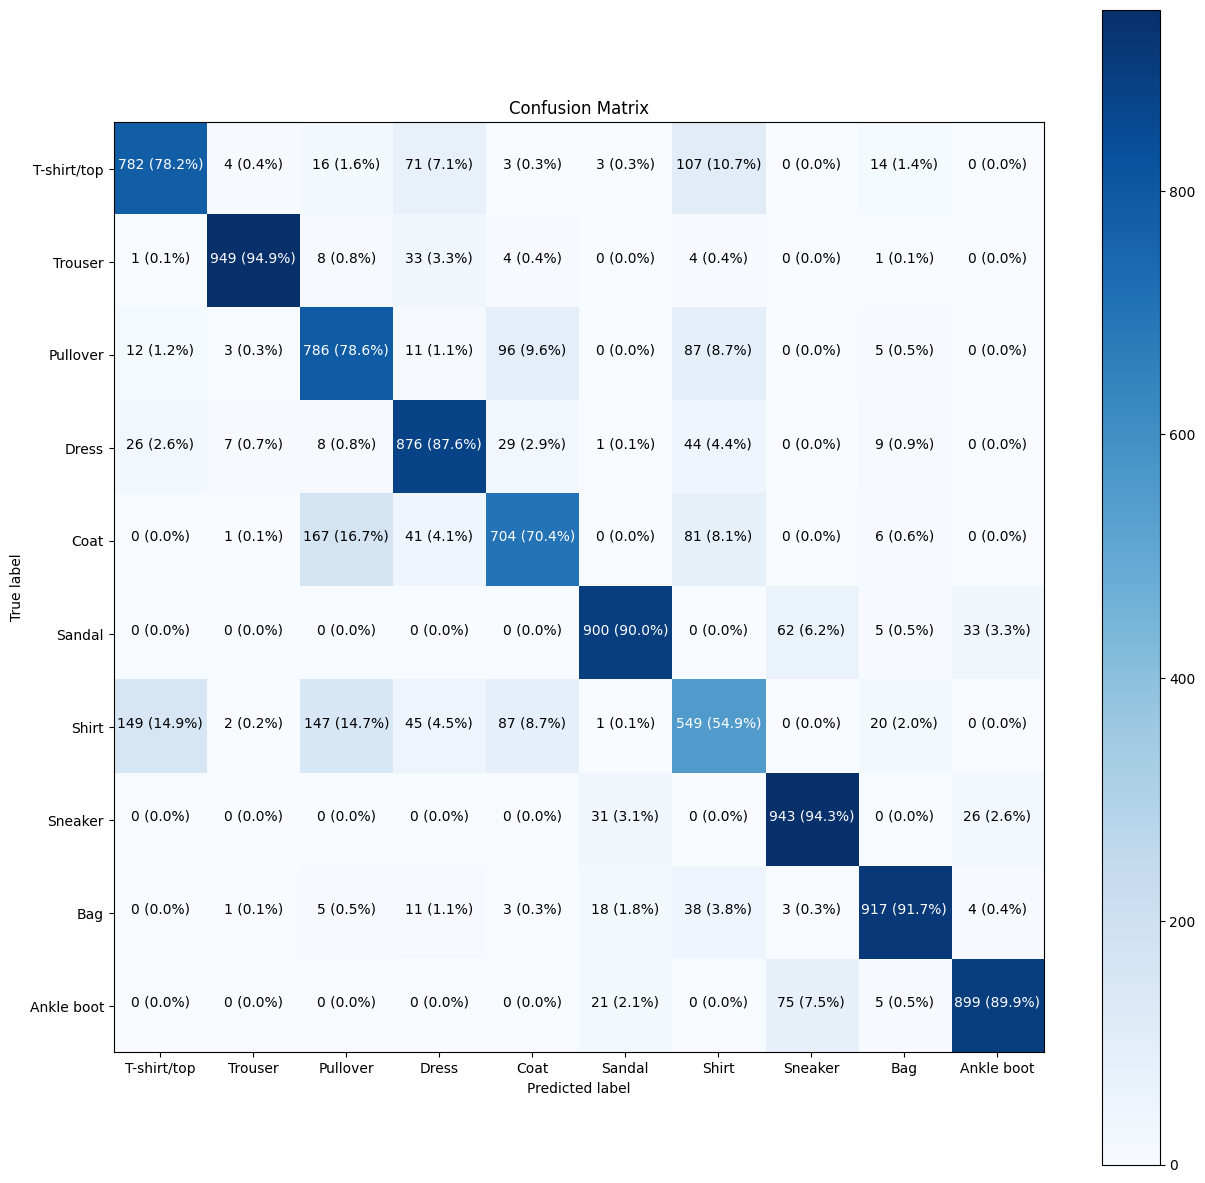

In [86]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [87]:
import random

def plot_random_image(model, images, true_labels, classes, num_images = 4):
  plt.figure(figsize = (9, 9))

  for i in range(num_images):
    # Setup random integer
    idx = random.randint(0, len(images) - 1)

    # Create predictions and targets
    target_image = images[idx]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[idx]]

    # Create a subplot for each image
    plt.subplot(2, 2, i + 1)
    plt.imshow(target_image, cmap = plt.cm.binary)

    # Change the color of the title based on prediction correctness
    color = 'green' if pred_label == true_label else 'red'

    # Add xlabel information (prediction/true label)
    plt.xlabel(f"Pred: {pred_label}, {100 * tf.reduce_max(pred_probs):.2f}%, True: {true_label}", color=color)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks

  plt.tight_layout()
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


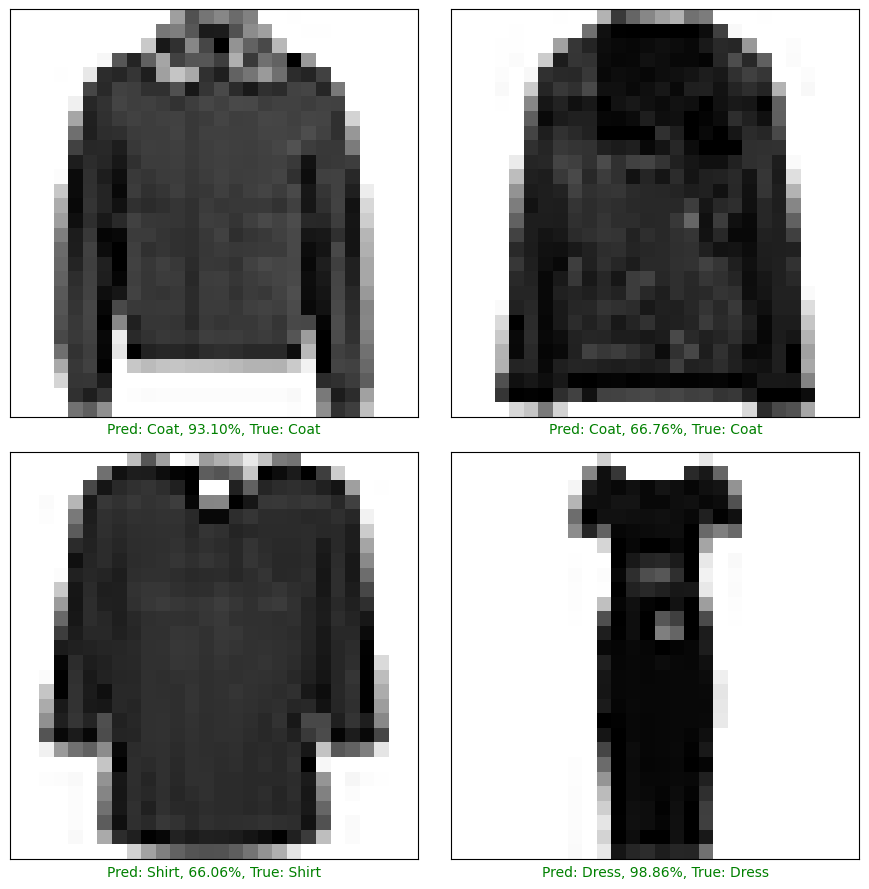

In [88]:
# Check out a random image as well as its prediction
plot_random_image(model = model_3,
                  images = test_data,
                  true_labels = test_labels,
                  classes = class_names)

In [62]:
# Find the layers of our model
model_3.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

In [64]:
# Extract a particular layer
model_3.layers[1]

<Dense name=dense_12, built=True>

In [66]:
# Get the patterns of a layer in our network
weights, biases = model_3.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.07966791,  0.05910195, -0.8183114 , -0.28203902],
        [ 0.02977115,  0.05877225, -0.95091236, -0.966258  ],
        [-0.08654892, -0.01589254,  1.8319801 , -2.1377711 ],
        ...,
        [-0.0457838 ,  0.04897383,  0.8612042 ,  0.32257178],
        [-0.05583202, -0.06833212, -0.24009296,  0.18621105],
        [-0.02384694,  0.02734321,  1.2472156 , -0.7364949 ]],
       dtype=float32),
 (784, 4))

In [68]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([-0.00625444, -0.00600411,  0.28493476,  0.53358406], dtype=float32),
 (4,))

In [89]:
model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 14)                  │          10,990 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 14)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 14)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,682 (135.48 KB)

 Trainable params: 11,560 (45.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,122 (90.32 KB)

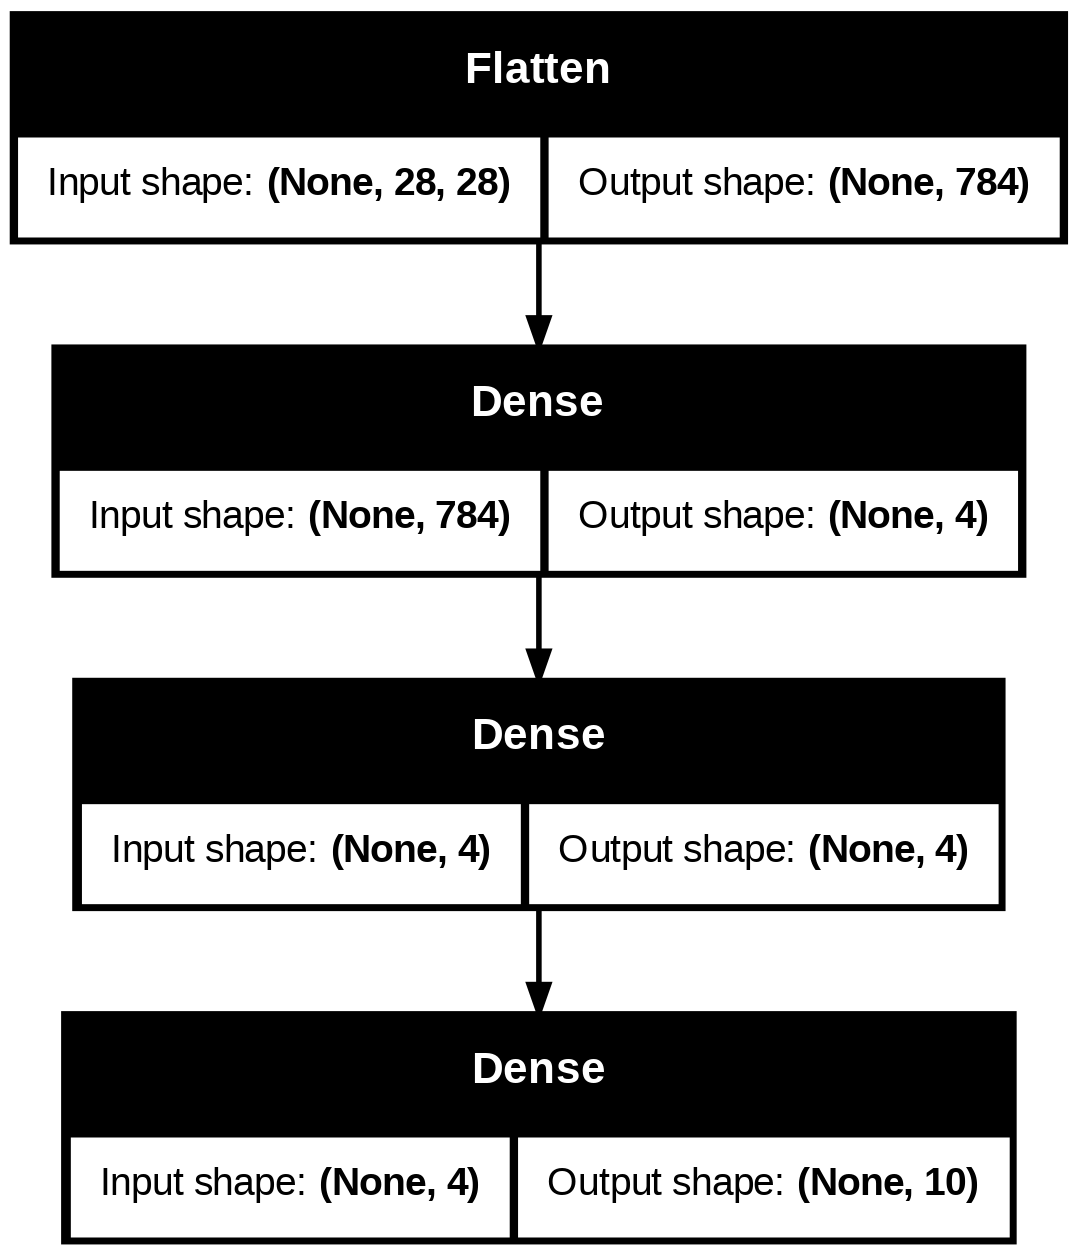

In [70]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_3, show_shapes=True)